In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

from scipy import integrate


1-1) iris 데이터셋 불러오고 데이터프레임 변환 후 첫 5개 행 출력

In [2]:
df = pd.read_csv('./iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


1-2) 데이터프레임 기본정보 확인, 각 열의 데이터 타입 제시

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


1-3) 붓꽃의 품종에 대한 클래스 분포를 확인하고, 각 클래스 별 데이터 개수를 제시

In [8]:
df.columns = ['꽃받침 길이','꽃받침 너비','꽃잎 길이','꽃잎 너비','품종']

In [12]:
species = df['품종'].unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
for a in species:
    print(f'붓꽃 {a}종의 데이터 수: {df[a==df["품종"]].shape[0]}')

붓꽃 setosa종의 데이터 수: 50
붓꽃 versicolor종의 데이터 수: 50
붓꽃 virginica종의 데이터 수: 50


2-1)붓꽃 데이터셋에서 각 특성 간의 산점도를 그리되, 각 클래스 별로 다른 색상을 사용하여 시각화 하시오

In [36]:
iris_color = ['mediumslateblue','darkviolet','violet']  # 색 리스트

In [37]:
# color dict 설정
color_dict = {}
i=0
for a in species:
    color_dict[a] = iris_color[i]
    i+=1
print(color_dict)

{'setosa': 'mediumslateblue', 'versicolor': 'darkviolet', 'virginica': 'violet'}


In [38]:
# 특성별로 그래프를 그리되, 한 그래프 내에 품종별로 다른 색 사용
char_list=list(df.columns[:-1])
char_list

['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비']

In [49]:
# 특성 리스트(char_list) 중 2 개씩 골라서 산점도 만들 필요 있음
char_2d_list=[]
for a in range(4):
    for b in range(4):
        if b>a:
            char_2d_list.append([char_list[a],char_list[b]])
char_2d_list

[['꽃받침 길이', '꽃받침 너비'],
 ['꽃받침 길이', '꽃잎 길이'],
 ['꽃받침 길이', '꽃잎 너비'],
 ['꽃받침 너비', '꽃잎 길이'],
 ['꽃받침 너비', '꽃잎 너비'],
 ['꽃잎 길이', '꽃잎 너비']]

In [46]:
def make_scatter(list_2d):
    for a in list_2d:
        plt.figure(figsize=(12,8))
        for i,c in color_dict.items():
            plt.scatter(df[df['품종']==i][a[0]], df[df['품종']==i][a[1]], color=c,label=i)
        plt.legend()
        plt.title(f'[{a[0]} 와 {a[1]}의 산점도]')
        plt.xlabel(f'{a[0]}')
        plt.ylabel(f'{a[1]}')
        plt.show()

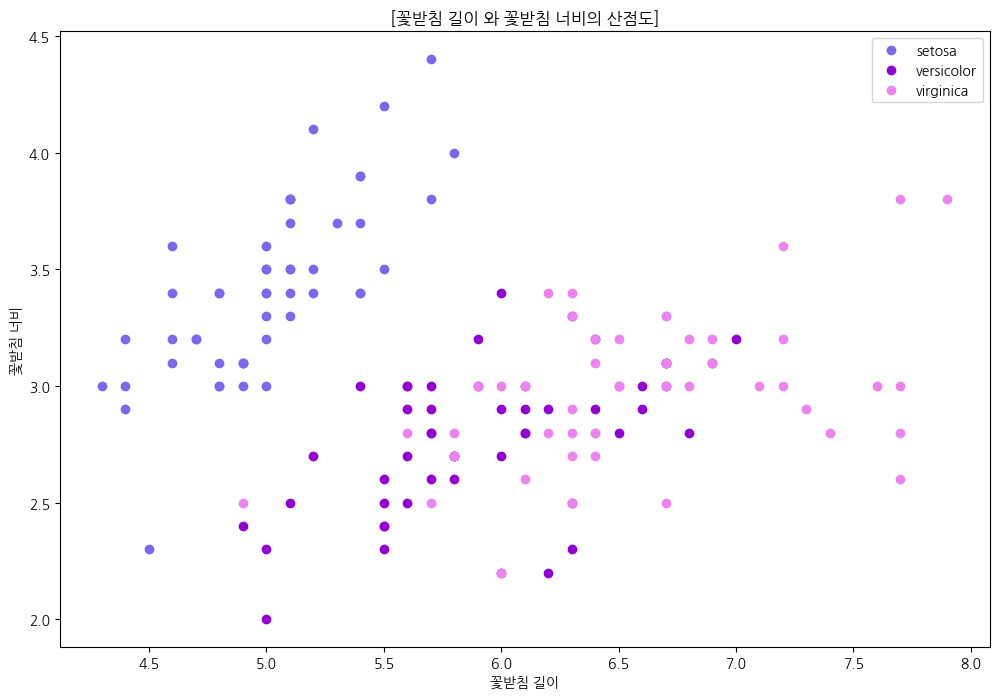

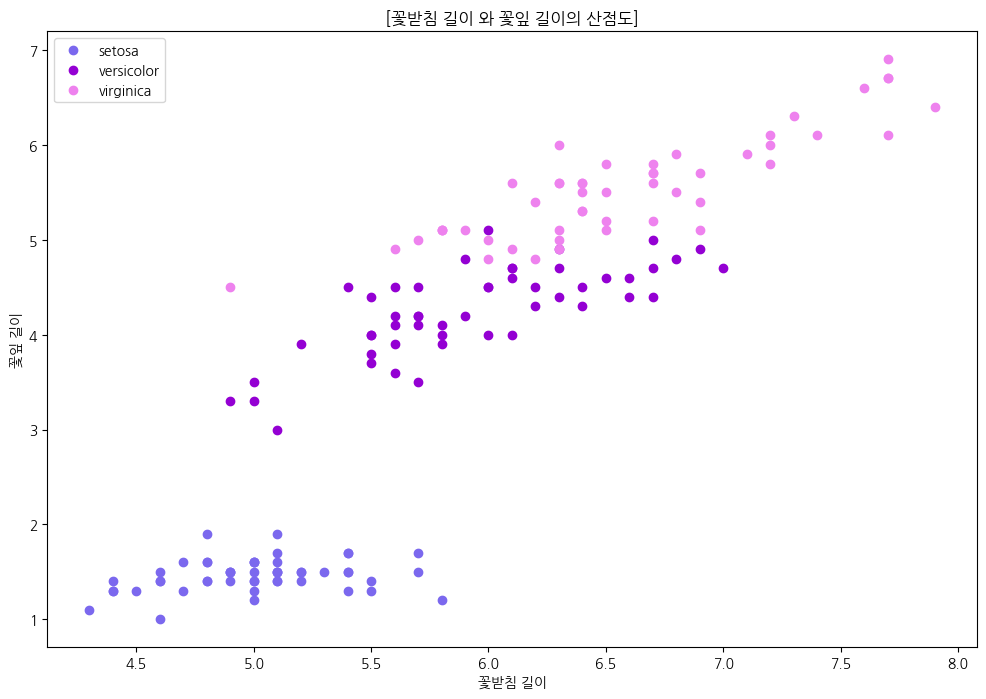

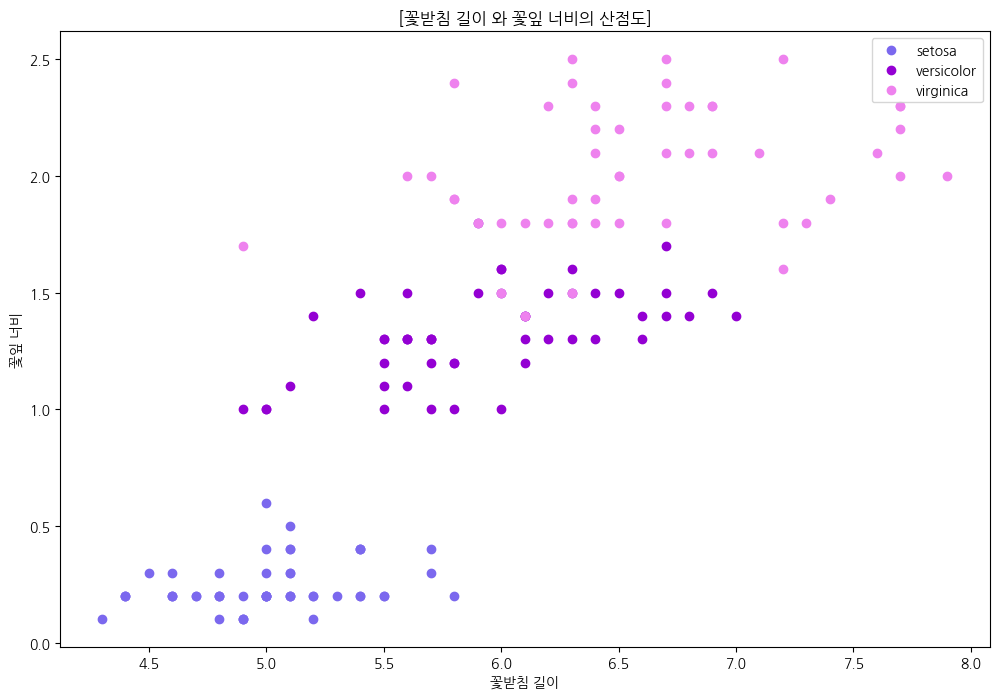

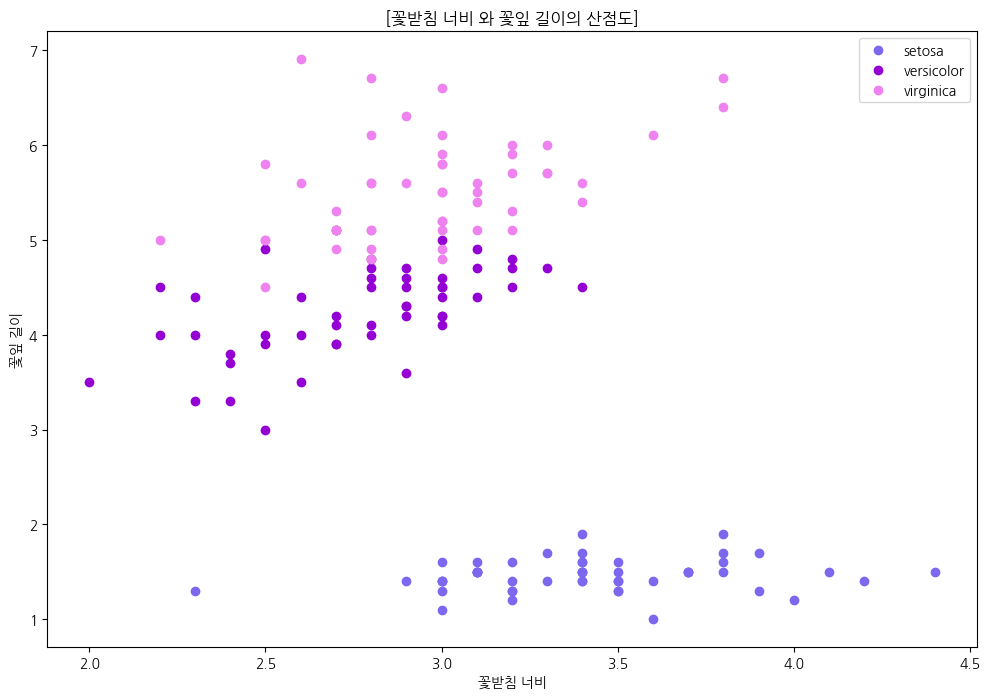

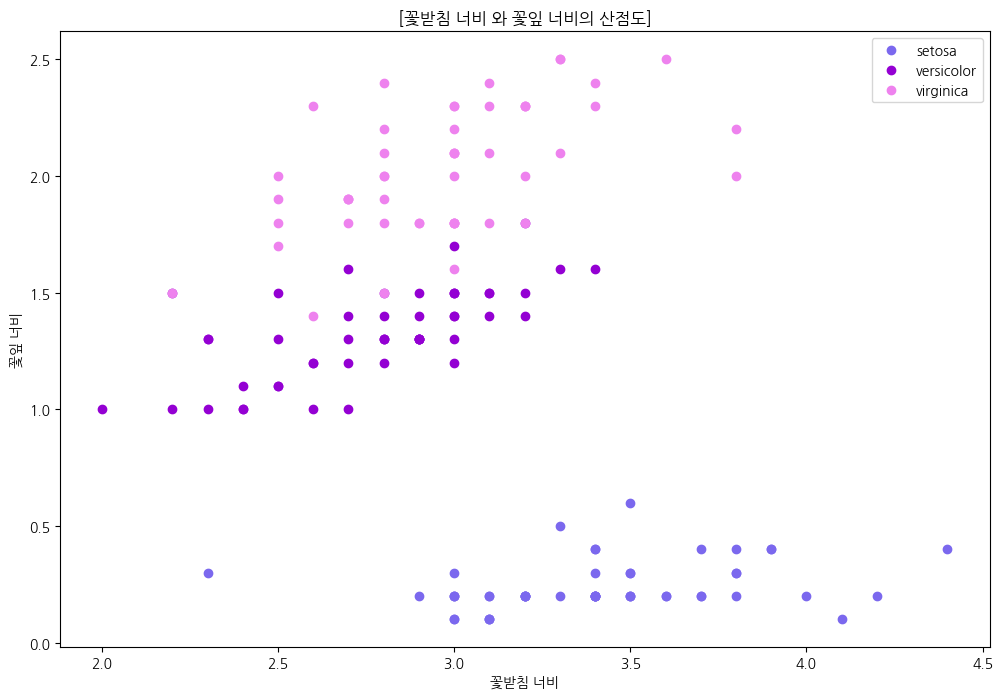

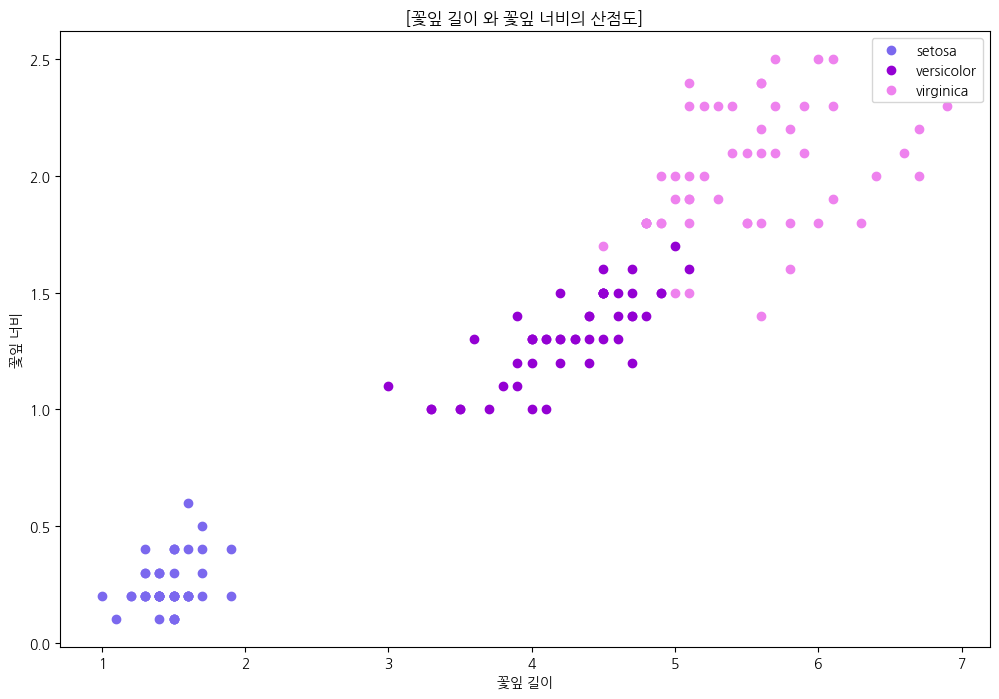

In [47]:
make_scatter(char_2d_list)

2-2) 꽃받침 길이와 꽃받침 너비의 관계를 시각화 하고, 각 클레스 별로 구분하여 출력하시오

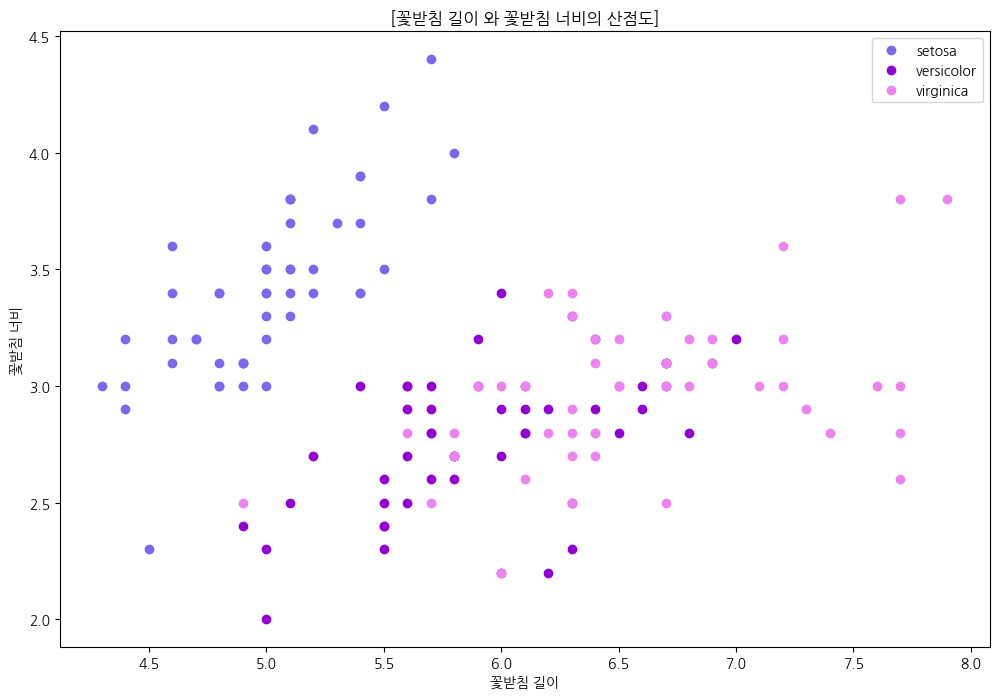

In [48]:
make_scatter([['꽃받침 길이','꽃받침 너비']])

3-1) 꽃잎의 길이를 연속확률변수로 가정할 때, 이 확률변수의 평균과 분산을 계산하시오

In [194]:
f_array=np.array(df['꽃잎 길이'].unique())
f_array.sort()
print(f_array)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]


In [122]:
len(f_array)

43

In [131]:
length_array=np.array(df['꽃잎 길이'])
length_array

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [78]:
f_series=df['꽃잎 길이'].value_counts()
f_series.sort_index()

꽃잎 길이
1.0     1
1.1     1
1.2     2
1.3     7
1.4    12
1.5    14
1.6     7
1.7     4
1.9     2
3.0     1
3.3     2
3.5     2
3.6     1
3.7     1
3.8     1
3.9     3
4.0     5
4.1     3
4.2     4
4.3     2
4.4     4
4.5     8
4.6     3
4.7     5
4.8     4
4.9     5
5.0     4
5.1     8
5.2     2
5.3     2
5.4     2
5.5     3
5.6     6
5.7     3
5.8     3
5.9     2
6.0     2
6.1     3
6.3     1
6.4     1
6.6     1
6.7     2
6.9     1
Name: count, dtype: int64

In [94]:
len(f_series)

43

In [67]:
df['꽃잎 길이'].value_counts()[1.4]

12

In [123]:
# 꽃잎 길이의 상한과 하한 설정
x_range = f_array
print(x_range[0])
print(x_range[-1])

1.0
6.9


In [124]:
# 꽃잎 길이를 값x로 하는 확률함수 f(x)를 생성
def f(x):
    if x_range[0] <= x <= x_range[-1]:
        return f_series[x]/150
    else:
        return 0

In [125]:
f(1.4)

0.08

In [126]:
# 확률변수 X 설정
X = [x_range, f]

In [127]:
x_set = f_array

In [135]:
def E(X, g=lambda x : x):
    x_set, f = X
    return np.sum(g(x_k)*f(x_k) for x_k in x_set)

def V(X, g=lambda x : x):
    x_set, f = X
    mean = E(X,g)
    return np.sum([(x_k-mean)**2 *f(x_k) for x_k in x_set])

In [129]:
print(x_range)

[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.9 3.  3.3 3.5 3.6 3.7 3.8 3.9 4.  4.1
 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9
 6.  6.1 6.3 6.4 6.6 6.7 6.9]


In [137]:
# 이산확률변수 계산
print(f'평균: {E(X)}')
print(f'분산: {V(X)}')

평균: 3.7586666666666666
분산: 3.092424888888889


C:\Users\KDP-23\AppData\Local\Temp\ipykernel_13612\1051933804.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(g(x_k)*f(x_k) for x_k in x_set)


In [139]:
# np.mean, np.var으로 array 계산(연속확률?)
print(np.mean(length_array))
print(np.var(length_array))

3.758666666666666
3.092424888888889


3-2)꽃잎 너비 를 연속확률변수로 가정할때, 이 확률변수의 확률밀도함수 계산, 그래프로 시각화하기

In [148]:
# 꽃잎 너비의 상한과 하한 설정
w_range = np.array(df['꽃잎 너비'].unique())
w_range.sort()
print(w_range[0])
print(w_range[-1])
print(len(w_range))

0.1
2.5
22


In [140]:
width_series=df['꽃잎 너비'].value_counts()
width_series.sort_index()

꽃잎 너비
0.1     6
0.2    28
0.3     7
0.4     7
0.5     1
0.6     1
1.0     7
1.1     3
1.2     5
1.3    13
1.4     8
1.5    12
1.6     4
1.7     2
1.8    12
1.9     5
2.0     6
2.1     6
2.2     3
2.3     8
2.4     3
2.5     3
Name: count, dtype: int64

In [152]:
# 꽃잎 너비를 값x로 하는 확률함수 h(x)를 생성
def h(x):
    if w_range[0] <= x <= w_range[-1]:
        return width_series[x]/150
    else:
        return 0

In [190]:
fw_array=np.array(df['꽃잎 너비'])
fw_array

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [195]:
from scipy import integrate
from scipy.stats import norm

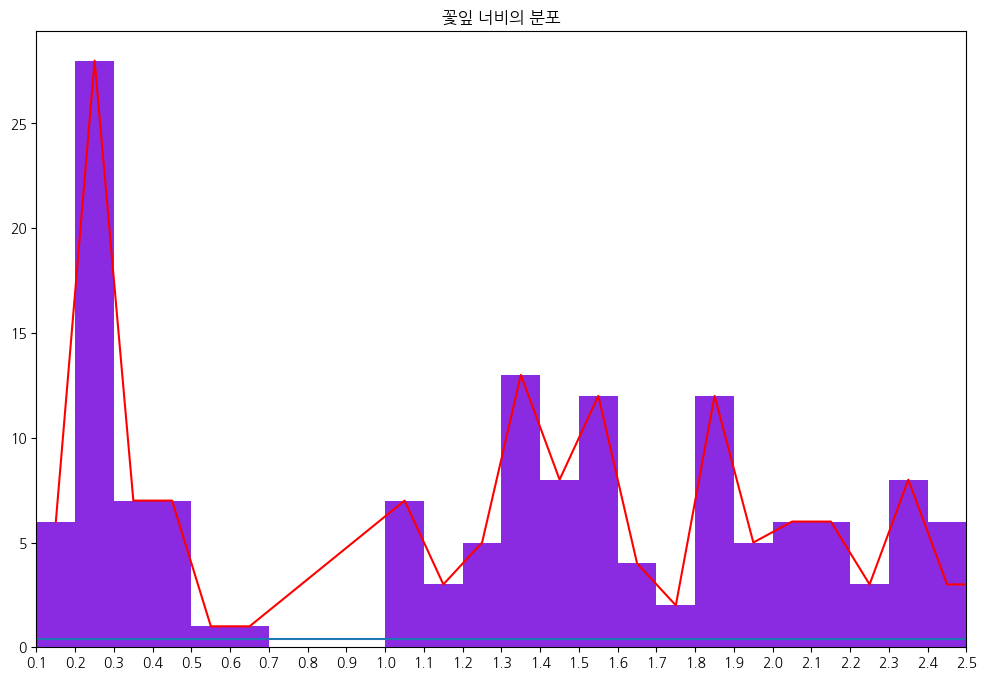

In [193]:
plt.figure(figsize=(12,8))
plt.hist(np.array(df['꽃잎 너비']), bins=24, color='blueviolet')
plt.xticks(np.linspace(w_range[0],w_range[-1],25))
plt.plot(w_range+0.05,width_series.sort_index(),color='r')
plt.xlim(w_range[0],w_range[-1])
plt.title('꽃잎 너비의 분포')
plt.show()

3-3)꽃잎의 길이가 4cm 이상 5cm 미만일 확률을 계산하시오

In [196]:
length_array

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [203]:
((length_array >= 4) & (length_array < 5)).sum() / len(length_array) * 100
    
    
        

28.666666666666668